<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 20px; height: 55px">

# Lab 3.02: Statistical Modeling and Model Validation

> Authors: Tim Book, Matt Brems

---

## Objective
The goal of this lab is to guide you through the modeling workflow to produce the best model you can. In this lesson, you will follow all best practices when slicing your data and validating your model. 

## Imports

In [80]:
# Import everything you need here.
# You may want to return to this cell to import more things later in the lab.
# DO NOT COPY AND PASTE FROM OUR CLASS SLIDES!
# Muscle memory is important!

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import r2_score

## Read Data
The `citibike` dataset consists of Citi Bike ridership data for over 224,000 rides in February 2014.

In [5]:
# Read in the citibike data in the data folder in this repository.
citibike_feb = pd.read_csv('data/citibike_feb2014.csv')


## Explore the data
Use this space to familiarize yourself with the data.

Convince yourself there are no issues with the data. If you find any issues, clean them here.

In [6]:
citibike_feb.head(1)

,tripduration,starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,end station longitude,bikeid,usertype,birth year,gender
0,382,2014-02-01 00:00:00,2014-02-01 00:06:22,294,Washington Square E,40.730494,-73.995721,265,Stanton St & Chrystie St,40.722293,-73.991475,21101,Subscriber,1991,1


In [7]:
citibike_feb.describe()

,tripduration,start station id,start station latitude,start station longitude,end station id,end station latitude,end station longitude,bikeid,gender
count,224736.000000,224736.000000,224736.000000,224736.000000,224736.000000,224736.000000,224736.000000,224736.000000,224736.000000
mean,874.519810,439.203479,40.734366,-73.990386,440.741995,40.734221,-73.990521,18010.598222,1.154617
std,5486.092219,335.723861,0.019031,0.011853,341.497433,0.019048,0.011920,1987.769335,0.436592
min,60.000000,72.000000,40.680342,-74.017134,72.000000,40.680342,-74.017134,14529.000000,0.000000
25%,360.000000,305.000000,40.721854,-73.998522,305.000000,40.721816,-73.999061,16302.000000,1.000000
50%,544.000000,403.000000,40.736197,-73.990617,403.000000,40.735877,-73.990741,17975.000000,1.000000
75%,845.000000,490.000000,40.749156,-73.981918,488.000000,40.749013,-73.981948,19689.000000,1.000000
max,766108.000000,3002.000000,40.770513,-73.950048,3002.000000,40.770513,-73.950048,21542.000000,2.000000


In [8]:
citibike_feb.dtypes

tripduration                 int64
starttime                   object
stoptime                    object
start station id             int64
start station name          object
start station latitude     float64
start station longitude    float64
end station id               int64
end station name            object
end station latitude       float64
end station longitude      float64
bikeid                       int64
usertype                    object
birth year                  object
gender                       int64
dtype: object

In [9]:
citibike_feb.isnull().sum()

tripduration               0
starttime                  0
stoptime                   0
start station id           0
start station name         0
start station latitude     0
start station longitude    0
end station id             0
end station name           0
end station latitude       0
end station longitude      0
bikeid                     0
usertype                   0
birth year                 0
gender                     0
dtype: int64

In [10]:
#from https://www.citibikenyc.com/system-data
#Gender (Zero=unknown; 1=male; 2=female)
citibike_feb['gender'].unique()

array([1, 2, 0])

In [11]:
#replace '\N' with np.NaN
# citibike_feb['birth year'].replace(to_replace= '\N',value=np.NaN, inplace=True)
citibike_feb['birth year'].iloc[31]= np.NaN

/Users/merylduff/opt/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


In [12]:
#checking my work
citibike_feb.iloc[31]

tripduration                                   664
starttime                      2014-02-01 00:08:47
stoptime                       2014-02-01 00:19:51
start station id                               237
start station name                 E 11 St & 2 Ave
start station latitude                     40.7305
start station longitude                   -73.9867
end station id                                 349
end station name           Rivington St & Ridge St
end station latitude                       40.7185
end station longitude                     -73.9833
bikeid                                       17540
usertype                                  Customer
birth year                                     NaN
gender                                           0
Name: 31, dtype: object

In [13]:
# turn \\N into np.NaN
citibike_feb.loc[(citibike_feb['birth year']=='\\N')]= np.NaN

In [14]:
# turn year into number
pd.to_numeric(citibike_feb['birth year'])

0         1991.0
1         1979.0
2         1948.0
3         1981.0
4         1990.0
           ...  
224731    1976.0
224732    1985.0
224733    1968.0
224734    1982.0
224735    1960.0
Name: birth year, Length: 224736, dtype: float64

In [15]:
# checking years
citibike_feb['birth year'].unique()

array(['1991', '1979', '1948', '1981', '1990', '1978', '1944', '1983',
       '1969', '1986', '1962', '1965', '1942', '1989', '1980', '1957',
       '1951', '1992', '1971', '1982', '1968', '1984', nan, '1956',
       '1987', '1985', '1996', '1975', '1988', '1974', '1972', '1959',
       '1973', '1977', '1976', '1953', '1993', '1970', '1963', '1967',
       '1966', '1960', '1961', '1994', '1958', '1955', '1946', '1964',
       '1900', '1995', '1954', '1952', '1949', '1947', '1941', '1938',
       '1950', '1945', '1997', '1934', '1940', '1939', '1936', '1943',
       '1935', '1937', '1922', '1932', '1907', '1926', '1899', '1901',
       '1917', '1910', '1933', '1921', '1927', '1913'], dtype=object)

In [16]:
#dropping NaN
citibike_feb.dropna(axis = 0,inplace=True)

In [17]:
citibike_feb['birth year'].sort_values().unique()

array(['1899', '1900', '1901', '1907', '1910', '1913', '1917', '1921',
       '1922', '1926', '1927', '1932', '1933', '1934', '1935', '1936',
       '1937', '1938', '1939', '1940', '1941', '1942', '1943', '1944',
       '1945', '1946', '1947', '1948', '1949', '1950', '1951', '1952',
       '1953', '1954', '1955', '1956', '1957', '1958', '1959', '1960',
       '1961', '1962', '1963', '1964', '1965', '1966', '1967', '1968',
       '1969', '1970', '1971', '1972', '1973', '1974', '1975', '1976',
       '1977', '1978', '1979', '1980', '1981', '1982', '1983', '1984',
       '1985', '1986', '1987', '1988', '1989', '1990', '1991', '1992',
       '1993', '1994', '1995', '1996', '1997'], dtype=object)

-----

## (OPTIONAL) Is average trip duration different by gender?

Conduct a hypothesis test that checks whether or not the average trip duration is different for `gender=1` and `gender=2`. Be sure to specify your null and alternative hypotheses, and to state your conclusion carefully and correctly!

*Note:* We haven't covered this in class yet, so this is a challenge/optional question if you wanted to look into [hypothesis tests](https://towardsdatascience.com/hypothesis-testing-in-machine-learning-using-python-a0dc89e169ce) on your own!

-----

## What numeric columns shouldn't be treated as numeric?

**Answer:** Gender is coded as (Zero=unknown; 1=male; 2=female) and should not be treated as numeric. 

## Dummify the `start station id` variable

In [33]:
startstation=citibike_feb.value_counts('start station id')
startstation= pd.DataFrame(startstation).reset_index()
startstation.rename(columns={'start station id':'id',"0":'counts'})

,id,0
0,293.0,2858
1,519.0,2675
2,497.0,2405
3,435.0,2360
4,521.0,2114
...,...,...
324,418.0,51
325,443.0,41
326,278.0,41
327,2005.0,36


## Engineer a feature called `age` that shares how old the person would have been in 2014 (at the time the data was collected).

- Note: you will need to clean the data a bit.

In [19]:
citibike_feb.head(1)

,tripduration,starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,end station longitude,bikeid,usertype,birth year,gender
0,382.0,2014-02-01 00:00:00,2014-02-01 00:06:22,294.0,Washington Square E,40.730494,-73.995721,265.0,Stanton St & Chrystie St,40.722293,-73.991475,21101.0,Subscriber,1991,1.0


In [20]:
# https://stackoverflow.com/questions/35552874/get-first-letter-of-a-string-from-column
citibike_feb['startyear']=citibike_feb['starttime'].str[0:4]
citibike_feb.head(1)

,tripduration,starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,end station longitude,bikeid,usertype,birth year,gender,startyear
0,382.0,2014-02-01 00:00:00,2014-02-01 00:06:22,294.0,Washington Square E,40.730494,-73.995721,265.0,Stanton St & Chrystie St,40.722293,-73.991475,21101.0,Subscriber,1991,1.0,2014


In [21]:
# cast as int
pd.to_numeric(citibike_feb['startyear'])

0         2014
1         2014
2         2014
3         2014
4         2014
          ... 
224731    2014
224732    2014
224733    2014
224734    2014
224735    2014
Name: startyear, Length: 218019, dtype: int64

In [22]:
#reviewing birth years
#cast as int
pd.to_numeric(citibike_feb['birth year'])

0         1991
1         1979
2         1948
3         1981
4         1990
          ... 
224731    1976
224732    1985
224733    1968
224734    1982
224735    1960
Name: birth year, Length: 218019, dtype: int64

In [23]:
#new column of "age"

citibike_feb['age']=pd.to_numeric(citibike_feb['startyear'])-pd.to_numeric(citibike_feb['birth year'])

In [24]:
# checking my work
citibike_feb['age'].sort_values().unique()

array([ 17,  18,  19,  20,  21,  22,  23,  24,  25,  26,  27,  28,  29,
        30,  31,  32,  33,  34,  35,  36,  37,  38,  39,  40,  41,  42,
        43,  44,  45,  46,  47,  48,  49,  50,  51,  52,  53,  54,  55,
        56,  57,  58,  59,  60,  61,  62,  63,  64,  65,  66,  67,  68,
        69,  70,  71,  72,  73,  74,  75,  76,  77,  78,  79,  80,  81,
        82,  87,  88,  92,  93,  97, 101, 104, 107, 113, 114, 115])

In [25]:
#dropping ages over 100
citibike_feb.drop(citibike_feb[citibike_feb['age'] > 100].index, inplace = True) 

In [26]:
# checking my work
citibike_feb['age'].sort_values().unique()

array([17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
       51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67,
       68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 87, 88,
       92, 93, 97])

In [101]:
citibike_feb['age'].describe()

count    217921.000000
mean         38.468954
std          11.316371
min          17.000000
25%          29.000000
50%          36.000000
75%          46.000000
max          97.000000
Name: age, dtype: float64

In [27]:
#dummifying usertype
citibike_feb = pd.get_dummies(data=citibike_feb, columns=['usertype'])

In [28]:
#checking my work
citibike_feb.head(1)

,tripduration,starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,end station longitude,bikeid,birth year,gender,startyear,age,usertype_Subscriber
0,382.0,2014-02-01 00:00:00,2014-02-01 00:06:22,294.0,Washington Square E,40.730494,-73.995721,265.0,Stanton St & Chrystie St,40.722293,-73.991475,21101.0,1991,1.0,2014,23,1


## Split your data into train/test data

**NOTE:** When doing your train/test split, please use random seed 123.

Look at the size of your data. What is a good proportion for your split? **Justify your answer.**

- Because we have a substantial amount of data, I would recommend an 75%-25% split in training and testing groups, respectively. This is because we will be able to train the model on many data points and do not want the model to be high variance, or over-fit to the data. 

In [29]:
citibike_feb.shape

(217921, 17)

In [30]:
citibike_feb.head()

,tripduration,starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,end station longitude,bikeid,birth year,gender,startyear,age,usertype_Subscriber
0,382.0,2014-02-01 00:00:00,2014-02-01 00:06:22,294.0,Washington Square E,40.730494,-73.995721,265.0,Stanton St & Chrystie St,40.722293,-73.991475,21101.0,1991,1.0,2014,23,1
1,372.0,2014-02-01 00:00:03,2014-02-01 00:06:15,285.0,Broadway & E 14 St,40.734546,-73.990741,439.0,E 4 St & 2 Ave,40.726281,-73.989780,15456.0,1979,2.0,2014,35,1
2,591.0,2014-02-01 00:00:09,2014-02-01 00:10:00,247.0,Perry St & Bleecker St,40.735354,-74.004831,251.0,Mott St & Prince St,40.723180,-73.994800,16281.0,1948,2.0,2014,66,1
3,583.0,2014-02-01 00:00:32,2014-02-01 00:10:15,357.0,E 11 St & Broadway,40.732618,-73.991580,284.0,Greenwich Ave & 8 Ave,40.739017,-74.002638,17400.0,1981,1.0,2014,33,1
4,223.0,2014-02-01 00:00:41,2014-02-01 00:04:24,401.0,Allen St & Rivington St,40.720196,-73.989978,439.0,E 4 St & 2 Ave,40.726281,-73.989780,19341.0,1990,1.0,2014,24,1


In [35]:
startstation.head(20)

,start station id,0
0,293.0,2858
1,519.0,2675
2,497.0,2405
3,435.0,2360
4,521.0,2114
5,490.0,1944
6,477.0,1873
7,382.0,1768
8,285.0,1737
9,151.0,1726


In [38]:
features=citibike_feb[['tripduration','age','usertype_Subscriber','gender','start station id']]


In [39]:
features

,tripduration,age,usertype_Subscriber,gender,start station id
0,382.0,23,1,1.0,294.0
1,372.0,35,1,2.0,285.0
2,591.0,66,1,2.0,247.0
3,583.0,33,1,1.0,357.0
4,223.0,24,1,1.0,401.0
...,...,...,...,...,...
224731,848.0,38,1,1.0,498.0
224732,1355.0,29,1,2.0,470.0
224733,304.0,46,1,1.0,497.0
224734,308.0,32,1,1.0,353.0


Use the `tripduration` column as your `y` variable.
For your `X` variables, use `age`, `usertype`, `gender`, and the dummy variables you created from `start station id`. (Hint: You may find the Pandas `.drop()` method helpful here.)

- could we also create new features comprised of start station id between 0-500, 501-1000, etc. etc?

In [98]:
features = pd.get_dummies(data=features, columns=['start station id'])

KeyError: "None of [Index(['start station id'], dtype='object')] are in the [columns]"

In [99]:
features.head()

,tripduration,age,usertype,gender,start station id_72.0,start station id_79.0,start station id_82.0,start station id_83.0,start station id_116.0,start station id_119.0,...,start station id_2006.0,start station id_2008.0,start station id_2009.0,start station id_2010.0,start station id_2012.0,start station id_2017.0,start station id_2021.0,start station id_2022.0,start station id_2023.0,start station id_3002.0
0,382.0,23,1,1.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,372.0,35,1,2.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,591.0,66,1,2.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,583.0,33,1,1.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,223.0,24,1,1.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [42]:
features = features.rename(columns={'usertype_Subscriber': 'usertype'})

In [95]:
X=features[['age','usertype','gender','start station id_293.0','start station id_519.0','start station id_497.0','start station id_521.0']]
y=features['tripduration']

In [44]:
#because it is automatically set to 75/25 i do not have to specify train/test size
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=123)

## Fit a linear regression model in `sklearn` predicting `tripduration`.

In [45]:
#instantiate 
lr=LinearRegression()
lr

LinearRegression()

In [46]:
#fit the model on training data
lr.fit(X_train,y_train)

LinearRegression()

In [65]:
#fit the model on test data
lr.fit(X_test,y_test)

LinearRegression()

In [67]:
#get the r2 score for the testing data
lr.score(X_test,y_test)

0.00028316753264845396

In [68]:
#predictions
y_preds=lr.predict(X_test)
y_preds

array([874.84768184, 820.86623492, 833.3234919 , ..., 874.84768184,
       899.7621958 , 849.93316787])

In [69]:
#residuals
residuals = y_test-y_preds
residuals.mean()

-4.470953321290043e-13

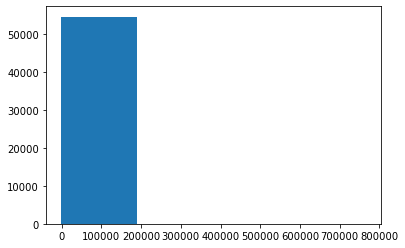

In [57]:
plt.hist(residuals,bins=4);

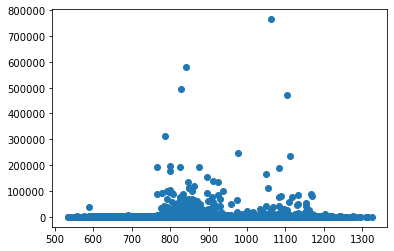

In [70]:
#y axis will be the residuals, and the x axis will be original predictions.
#https://git.generalassemb.ly/mduff12/3.03-lesson-regression-metrics/blob/master/solution-code/solution-code.ipynb
plt.scatter(y=residuals, x=y_preds);

- The residuals are not random nor normally distributed, meaning our LINE assumption 'normality' was violated as well as equal variances

## Evaluate your model
Look at some evaluation metrics for **both** the training and test data. 
- How did your model do? Is it overfit, underfit, or neither?
- Does this model outperform the baseline? (e.g. setting $\hat{y}$ to be the mean of our training `y` values.)

In [83]:
#get the r2 score for the training data
lr.score(X_train,y_train)

0.00011350427513423522

In [85]:
#get the r2 score for the testing data
lr.score(X_test,y_test)

0.00028316753264845396

In [71]:
#mean absolute error via Numpy
np.abs(residuals).mean()

650.5399705651807

 - Mean Absolute Error: refers to the average error. Here, it is 650 seconds. 

In [73]:
#sum squared error/RSS
rss = (residuals ** 2).sum()
rss

2314394616662.5786

In [78]:
# Mean Squared Error by hand
mean_squared_error(y_test, y_preds)

42480766.077395394

 - The MSE is supposed to 'punish' outliers, and represents the average distance of true values from the predicted values squared.

In [79]:
# RMSE
np.sqrt(mean_squared_error(y_test, y_preds))

6517.727063738968

This error metric is interpretable in the y units (seconds). The goal is to be as close to 0 as possible, so this is obviously very high and very off.

In [82]:
r2_score(y_test, y_preds)

0.00028316753264845396

 - this model cannot explain the variability among the data. 

## Fit a linear regression model in `statsmodels` predicting `tripduration`.

In [97]:
import statsmodels.api as sm
mod = sm.OLS(y,X)
res = mod.fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:           tripduration   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                  0.000
Method:                 Least Squares   F-statistic:                     10.28
Date:                Tue, 16 Feb 2021   Prob (F-statistic):           2.05e-11
Time:                        20:54:54   Log-Likelihood:            -2.1853e+06
No. Observations:              217921   AIC:                         4.371e+06
Df Residuals:                  217914   BIC:                         4.371e+06
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
age                        4

## (OPTIONAL) Using the `statsmodels` summary, test whether or not `age` has a significant effect when predicting `tripduration`.
- Be sure to specify your null and alternative hypotheses, and to state your conclusion carefully and correctly **in the context of your model**!

## Citi Bike is attempting to market to people who they think will ride their bike for a long time. Based on your modeling, what types of individuals should Citi Bike market toward?

 - I am struggling to interpret this data